<a href="https://colab.research.google.com/github/Sathyadev75/DS_PROJECTS_PRAKASH/blob/main/StackExchange_question_quality_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [787]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [788]:

import pandas as pd
import numpy as np
import statistics as st


import matplotlib.pyplot as plt
import seaborn as sns
from lxml import etree

In [789]:
import pandas as pd
from lxml import etree

# Path to the Posts.xml file
xml_file_path = '/content/drive/MyDrive/DATA SCIENCE PROJECTS/physics .stack/Posts.xml'

# Create an empty list to store the extracted features
data = []

# Parse the XML file
parser = etree.XMLParser(recover=True)  # Enable recovery mode to handle XML parsing errors
tree = etree.parse(xml_file_path, parser=parser)
root = tree.getroot()

# Iterate over each row (post) in the XML file
for row in root.iter('row'):
    # Extract the attributes for each post
    question_id = row.get('Id')
    post_type = row.get('PostTypeId')
    parent_id = row.get('ParentId')
    accepted_answer_id = row.get('AcceptedAnswerId')
    creation_date = row.get('CreationDate')
    score = int(row.get('Score', 0))
    view_count = int(row.get('ViewCount', 0))
    body_text = row.get('Body', '')
    owner_user_id = row.get('OwnerUserId')
    last_editor_user_id = row.get('LastEditorUserId')
    last_editor_display_name = row.get('LastEditorDisplayName')
    last_edit_date = row.get('LastEditDate')
    last_activity_date = row.get('LastActivityDate')
    community_owned_date = row.get('CommunityOwnedDate')
    closed_date = row.get('ClosedDate')
    title = row.get('Title', '')
    tags = row.get('Tags', '')
    answer_count = int(row.get('AnswerCount', 0))
    comment_count = int(row.get('CommentCount', 0))
    favorite_count = int(row.get('FavoriteCount', 0))

    # Create a dictionary to store the attributes
    data.append({
        'ID': question_id,
        'PostTypeId': post_type,
        'ParentID': parent_id,
        'AcceptedAnswerId': accepted_answer_id,
        'CreationDate': creation_date,
        'Score': score,
        'ViewCount': view_count,
        'Body': body_text,
        'OwnerUserId': owner_user_id,
        'LastEditorUserId': last_editor_user_id,
        'LastEditorDisplayName': last_editor_display_name,
        'LastEditDate': last_edit_date,
        'LastActivityDate': last_activity_date,
        'CommunityOwnedDate': community_owned_date,
        'ClosedDate': closed_date,
        'Title': title,
        'Tags': tags,
        'AnswerCount': answer_count,
        'CommentCount': comment_count,
        'FavoriteCount': favorite_count
    })

# Create a DataFrame from the extracted features
df = pd.DataFrame(data)

# Print the dataset
print(df.head())


  ID PostTypeId ParentID AcceptedAnswerId             CreationDate  Score  \
0  1          1     None                5  2010-11-02T18:59:01.140     76   
1  2          1     None             5704  2010-11-02T19:09:48.680     29   
2  3          1     None              180  2010-11-02T19:11:05.857     35   
3  4          2        1             None  2010-11-02T19:12:26.543     22   
4  5          2        1             None  2010-11-02T19:15:20.813     48   

   ViewCount                                               Body OwnerUserId  \
0      13803  <p>I often hear about subatomic particles havi...           7   
1       2641  <p>How would you explain string theory to non ...          23   
2       2412  <p>This is a question that has been posted at ...          40   
3          0  <p>Imagine going to the rest frame of a massiv...          20   
4          0  <p>Spin is a technical term specifically refer...          13   

  LastEditorUserId LastEditorDisplayName             LastEditD

In [790]:
# Create a new column to store the quality labels
df['Quality'] = None

# Label the data into three categories
df.loc[(df['Score'] > 5) & (df['AnswerCount'] > 0), 'Quality'] = 'Good-Quality'
df.loc[(df['Score'] >= 0) & (df['Score'] <= 5) & (df['AnswerCount'] == 0), 'Quality'] = 'Low-Quality'
df.loc[df['Score'] < 0, 'Quality'] = 'Very-Low-Quality'

# Print the updated dataset with quality labels
print(df.head())


  ID PostTypeId ParentID AcceptedAnswerId             CreationDate  Score  \
0  1          1     None                5  2010-11-02T18:59:01.140     76   
1  2          1     None             5704  2010-11-02T19:09:48.680     29   
2  3          1     None              180  2010-11-02T19:11:05.857     35   
3  4          2        1             None  2010-11-02T19:12:26.543     22   
4  5          2        1             None  2010-11-02T19:15:20.813     48   

   ViewCount                                               Body OwnerUserId  \
0      13803  <p>I often hear about subatomic particles havi...           7   
1       2641  <p>How would you explain string theory to non ...          23   
2       2412  <p>This is a question that has been posted at ...          40   
3          0  <p>Imagine going to the rest frame of a massiv...          20   
4          0  <p>Spin is a technical term specifically refer...          13   

  LastEditorUserId  ...             LastEditDate         LastA

In [791]:
df = df.drop(['Score', 'AnswerCount',"ID",'PostTypeId'], axis=1)
df.head()



,ParentID,AcceptedAnswerId,CreationDate,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,CommentCount,FavoriteCount,Quality
0,None,5,2010-11-02T18:59:01.140,13803,<p>I often hear about subatomic particles havi...,7,520,None,2012-08-19T23:00:18.417,2018-04-29T07:55:39.087,None,None,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,27,Good-Quality
1,None,5704,2010-11-02T19:09:48.680,2641,<p>How would you explain string theory to non ...,23,2451,None,2018-12-17T16:03:14.737,2018-12-17T16:03:14.737,None,None,What is your simplest explanation of the strin...,<string-theory><education>,4,8,Good-Quality
2,None,180,2010-11-02T19:11:05.857,2412,<p>This is a question that has been posted at ...,40,2451,None,2013-01-28T22:30:52.200,2013-03-09T16:47:46.040,None,None,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,5,13,Good-Quality
3,1,None,2010-11-02T19:12:26.543,0,<p>Imagine going to the rest frame of a massiv...,20,None,None,None,2010-11-02T19:12:26.543,None,None,,,3,0,None
4,1,None,2010-11-02T19:15:20.813,0,<p>Spin is a technical term specifically refer...,13,75633,None,2017-12-13T08:24:54.477,2017-12-13T08:24:54.477,None,None,,,0,0,None


In [792]:
df.columns

Index(['ParentID', 'AcceptedAnswerId', 'CreationDate', 'ViewCount', 'Body',
       'OwnerUserId', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'CommunityOwnedDate', 'ClosedDate',
       'Title', 'Tags', 'CommentCount', 'FavoriteCount', 'Quality'],
      dtype='object')

In [793]:
#Create a new column for the length of the 'Body' field
df['BodyLength'] = df['Body'].apply(lambda x: len(x))

# Create a new column for the length of the 'Title' field
df['TitleLength'] = df['Title'].apply(lambda x: len(x))
df.head(1)

,ParentID,AcceptedAnswerId,CreationDate,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,CommentCount,FavoriteCount,Quality,BodyLength,TitleLength
0,None,5,2010-11-02T18:59:01.140,13803,<p>I often hear about subatomic particles havi...,7,520,None,2012-08-19T23:00:18.417,2018-04-29T07:55:39.087,None,None,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,27,Good-Quality,248,50


In [794]:
df.info

<bound method DataFrame.info of      ParentID AcceptedAnswerId             CreationDate  ViewCount  \
0        None                5  2010-11-02T18:59:01.140      13803   
1        None             5704  2010-11-02T19:09:48.680       2641   
2        None              180  2010-11-02T19:11:05.857       2412   
3           1             None  2010-11-02T19:12:26.543          0   
4           1             None  2010-11-02T19:15:20.813          0   
...       ...              ...                      ...        ...   
7243     8227             None  2011-04-07T19:57:08.687          0   
7244     8227             None  2011-04-07T20:01:18.807          0   
7245     8227             None  2011-04-07T20:02:02.457          0   
7246     None             None  2011-04-07T21:13:12.223        558   
7247     8232             None  2011-04-07T21:51:38.997          0   

                                                   Body OwnerUserId  \
0     <p>I often hear about subatomic particles havi... 

In [795]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ViewCount,7248.0,1659.878173,9133.604238,0.0,0.0,0.0,353.25,243342.0
CommentCount,7248.0,2.744067,4.419281,0.0,0.0,1.0,4.00,114.0
FavoriteCount,7248.0,1.495447,7.996376,0.0,0.0,0.0,0.00,245.0
BodyLength,7248.0,1185.774834,1208.603062,0.0,442.0,817.0,1487.25,20926.0
TitleLength,7248.0,15.374586,27.427333,0.0,0.0,0.0,29.00,147.0


In [796]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ParentID               5161 non-null   object
 1   AcceptedAnswerId       1327 non-null   object
 2   CreationDate           7248 non-null   object
 3   ViewCount              7248 non-null   int64 
 4   Body                   7248 non-null   object
 5   OwnerUserId            6609 non-null   object
 6   LastEditorUserId       3297 non-null   object
 7   LastEditorDisplayName  301 non-null    object
 8   LastEditDate           3560 non-null   object
 9   LastActivityDate       7247 non-null   object
 10  CommunityOwnedDate     435 non-null    object
 11  ClosedDate             192 non-null    object
 12  Title                  7248 non-null   object
 13  Tags                   7248 non-null   object
 14  CommentCount           7248 non-null   int64 
 15  FavoriteCount        

In [797]:
df.isnull().sum()

ParentID                 2087
AcceptedAnswerId         5921
CreationDate                0
ViewCount                   0
Body                        0
OwnerUserId               639
LastEditorUserId         3951
LastEditorDisplayName    6947
LastEditDate             3688
LastActivityDate            1
CommunityOwnedDate       6813
ClosedDate               7056
Title                       0
Tags                        0
CommentCount                0
FavoriteCount               0
Quality                  2621
BodyLength                  0
TitleLength                 0
dtype: int64

check unique values of each column

In [798]:
col=df.columns
for i in col:

  print(i,df[i].value_counts())
  print("*"*14)

ParentID 1019    39
3432    19
6157    18
5265    15
629     15
        ..
6010     1
2559     1
6004     1
6032     1
8232     1
Name: ParentID, Length: 1976, dtype: int64
**************
AcceptedAnswerId 5       1
5204    1
5197    1
5203    1
5196    1
       ..
2339    1
2333    1
2338    1
2326    1
8231    1
Name: AcceptedAnswerId, Length: 1327, dtype: int64
**************
CreationDate 2011-02-28T21:37:25.860    2
2011-03-02T04:47:14.187    2
2011-01-09T23:03:13.830    2
2010-12-05T21:27:39.983    2
2010-12-05T21:17:14.717    2
                          ..
2011-01-08T16:21:49.930    1
2011-01-08T15:51:26.607    1
2011-01-08T14:59:59.273    1
2011-01-08T14:59:39.710    1
2011-04-07T21:51:38.997    1
Name: CreationDate, Length: 7236, dtype: int64
**************
ViewCount 0         5190
413          4
267          4
243          4
280          4
          ... 
3224         1
7678         1
544          1
10295        1
108479       1
Name: ViewCount, Length: 1679, dtype: int64
******

**DATA CLEANING **

In [799]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ParentID               5161 non-null   object
 1   AcceptedAnswerId       1327 non-null   object
 2   CreationDate           7248 non-null   object
 3   ViewCount              7248 non-null   int64 
 4   Body                   7248 non-null   object
 5   OwnerUserId            6609 non-null   object
 6   LastEditorUserId       3297 non-null   object
 7   LastEditorDisplayName  301 non-null    object
 8   LastEditDate           3560 non-null   object
 9   LastActivityDate       7247 non-null   object
 10  CommunityOwnedDate     435 non-null    object
 11  ClosedDate             192 non-null    object
 12  Title                  7248 non-null   object
 13  Tags                   7248 non-null   object
 14  CommentCount           7248 non-null   int64 
 15  FavoriteCount        

**Handling null values **

In [800]:
# Check for null values in each column
columns_with_null = df.columns[df.isnull().sum()>3000].tolist()

df = df.drop(columns_with_null, axis=1)
print(df.isnull().sum())

print(columns_with_null)

ParentID            2087
CreationDate           0
ViewCount              0
Body                   0
OwnerUserId          639
LastActivityDate       1
Title                  0
Tags                   0
CommentCount           0
FavoriteCount          0
Quality             2621
BodyLength             0
TitleLength            0
dtype: int64
['AcceptedAnswerId', 'LastEditorUserId', 'LastEditorDisplayName', 'LastEditDate', 'CommunityOwnedDate', 'ClosedDate']


In [801]:
df["ParentID"].value_counts()

1019    39
3432    19
6157    18
5265    15
629     15
        ..
6010     1
2559     1
6004     1
6032     1
8232     1
Name: ParentID, Length: 1976, dtype: int64

In [802]:
df["Quality"].value_counts()

Low-Quality         3319
Good-Quality        1097
Very-Low-Quality     211
Name: Quality, dtype: int64

In [803]:
df["OwnerUserId"].value_counts()

1236    488
1352    190
329     152
1272    135
74      129
       ... 
1646      1
495       1
1375      1
1643      1
2978      1
Name: OwnerUserId, Length: 921, dtype: int64

In [804]:
#filling missing values using most frquent values in respective columns
columns_with_null = df.columns[df.isnull().any()].tolist()

for i in columns_with_null:
   df[i]=df[i].replace({None:st.mode(df[i])})
print(df.isnull().sum())

ParentID            2087
CreationDate           0
ViewCount              0
Body                   0
OwnerUserId          639
LastActivityDate       0
Title                  0
Tags                   0
CommentCount           0
FavoriteCount          0
Quality                0
BodyLength             0
TitleLength            0
dtype: int64


In [805]:
import pandas as pd

columns_with_null = df.columns[df.isnull().any()].tolist()

for column in columns_with_null:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)

print(df.isnull().sum())


ParentID            0
CreationDate        0
ViewCount           0
Body                0
OwnerUserId         0
LastActivityDate    0
Title               0
Tags                0
CommentCount        0
FavoriteCount       0
Quality             0
BodyLength          0
TitleLength         0
dtype: int64


In [806]:
df=df.drop_duplicates()


In [807]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])

In [808]:
df.dtypes


ParentID                    object
CreationDate        datetime64[ns]
ViewCount                    int64
Body                        object
OwnerUserId                 object
LastActivityDate    datetime64[ns]
Title                       object
Tags                        object
CommentCount                 int64
FavoriteCount                int64
Quality                     object
BodyLength                   int64
TitleLength                  int64
dtype: object

In [809]:
list_cat_vars=[column for column in df.columns if df[column].dtype==object]
print("categorical_columns: \n",list_cat_vars)


categorical_columns: 
 ['ParentID', 'Body', 'OwnerUserId', 'Title', 'Tags', 'Quality']


In [810]:
list_con_vars=[column for column in df.columns if df[column].dtype==int]
print("continous_var_columns: \n",list_con_vars)


continous_var_columns: 
 ['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength', 'TitleLength']


**DATA VISUALIZATION**

**CATEGORICAL COLUMNS VS OUTPUT COLUMN**

In [811]:
list_cat_vars.remove("Tags")
list_cat_vars.remove("Title")
list_cat_vars.remove("Body")


In [812]:
list_cat_vars

['ParentID', 'OwnerUserId', 'Quality']

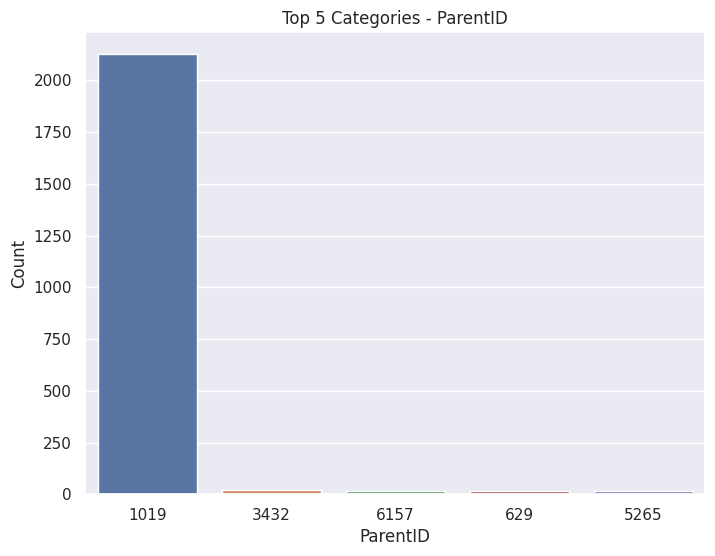

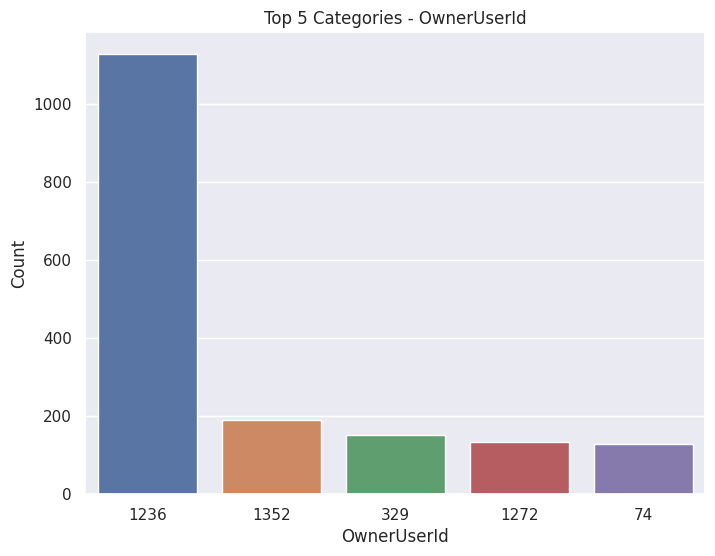

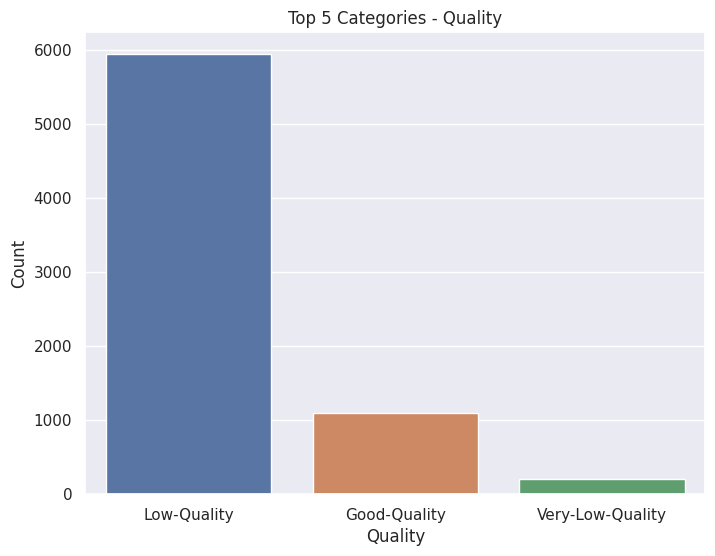

In [813]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Top N Categories for each categorical column
top_n = 5
for cat_column in list_cat_vars:
    top_categories = df[cat_column].value_counts().head(top_n)

    # Bar Chart for Top N Categories
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.xlabel(cat_column)
    plt.ylabel('Count')
    plt.title('Top {} Categories - {}'.format(top_n, cat_column))
    plt.show()

    # Pie Chart for Top N Categories
    fig = px.pie(top_categories, values=cat_column, names=top_categories.index)
    fig.show()

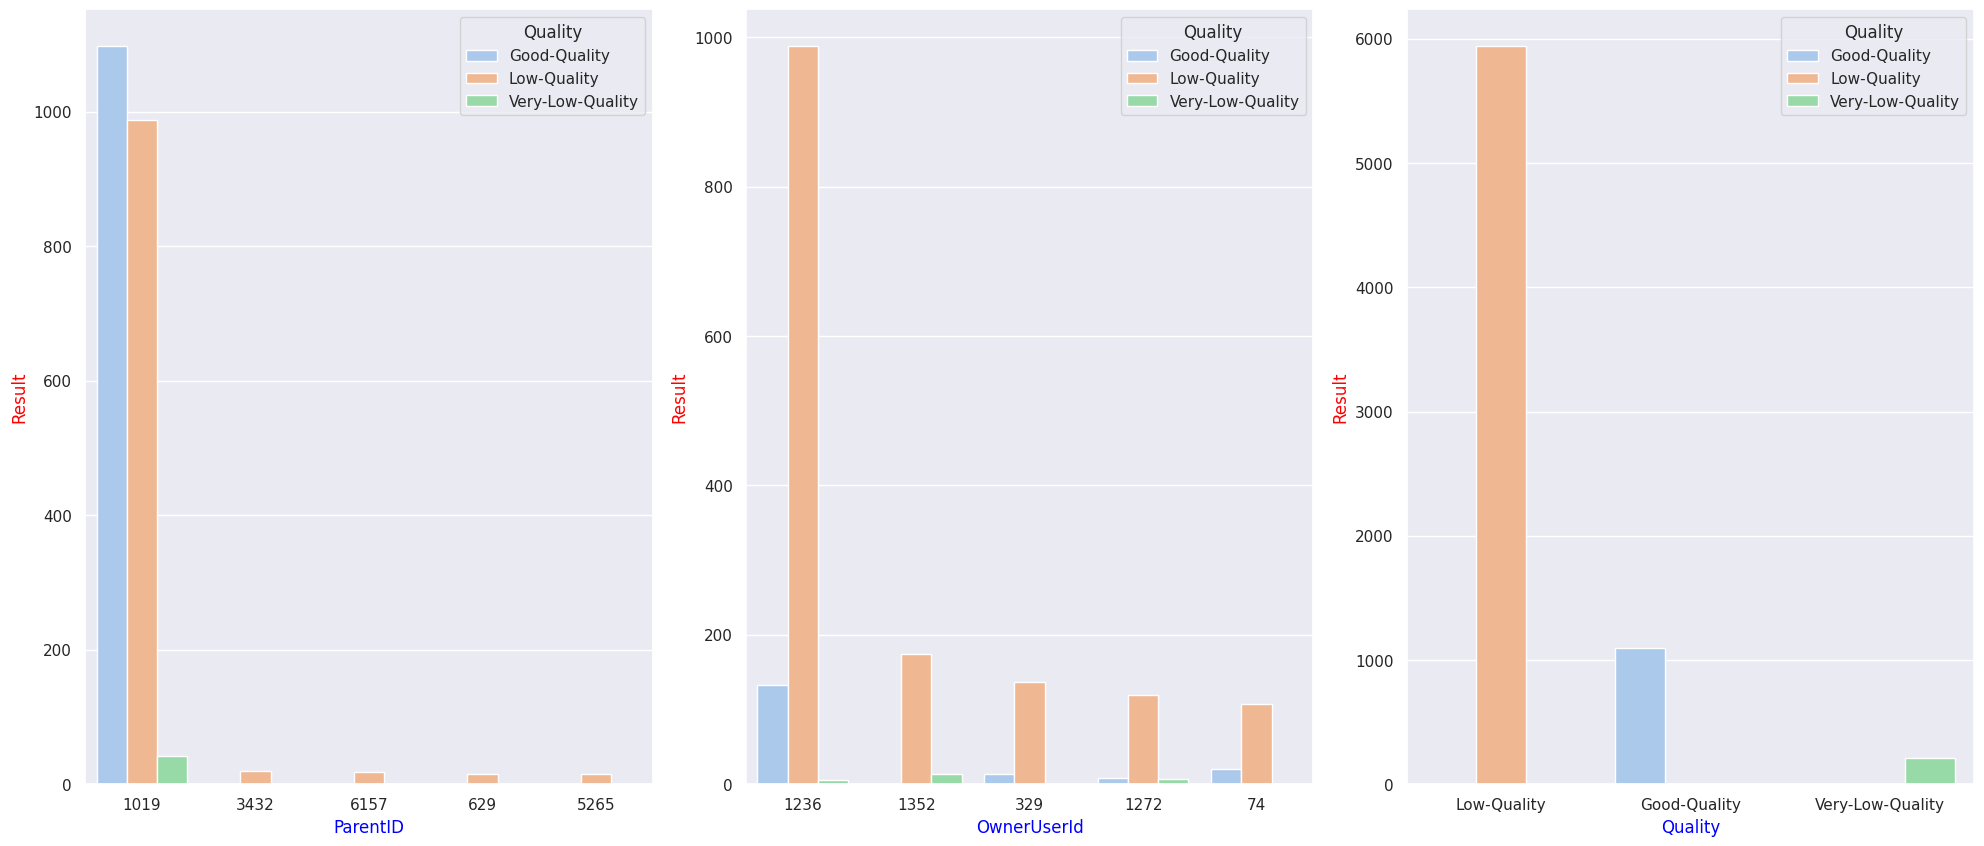

In [814]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
top_n = 5  # Number of top categories to show in each plot

sns.set_theme(style='darkgrid', palette='pastel')
plt.figure(figsize=(20, 25))

plots = len(list_cat_vars)

for index, cat_column in enumerate(list_cat_vars, start=1):
    plt.subplot(plots, 3, index)

    # Select the top N categories based on frequency
    top_categories = df[cat_column].value_counts().head(top_n).index

    sns.countplot(x=cat_column, hue="Quality", data=df, order=top_categories)
    plt.xlabel(cat_column, color="blue")
    plt.ylabel("Result", color="red")

plt.tight_layout()
plt.show()


**CONTINOUS VARIABLE VS OUTPUT VARIABLE**

In [815]:
#LIST OF CONTINOUS COLUMNS

list_con_vars=[column for column in df.columns if df[column].dtype=="int64"]
print(list_con_vars)

['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength', 'TitleLength']


<ipython-input-816-abc6b0a50452>:14: DeprecationWarning:

Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.

<ipython-input-816-abc6b0a50452>:14: DeprecationWarning:

Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.

<ipython-input-816-abc6b0a50452>:14: DeprecationWarning:

Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.

<ipython-input-816-abc6b0a50452>:14: DeprecationWarning:

Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.

<ipython-input-816-abc6b0a50452>:14: DeprecationWarning:

Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



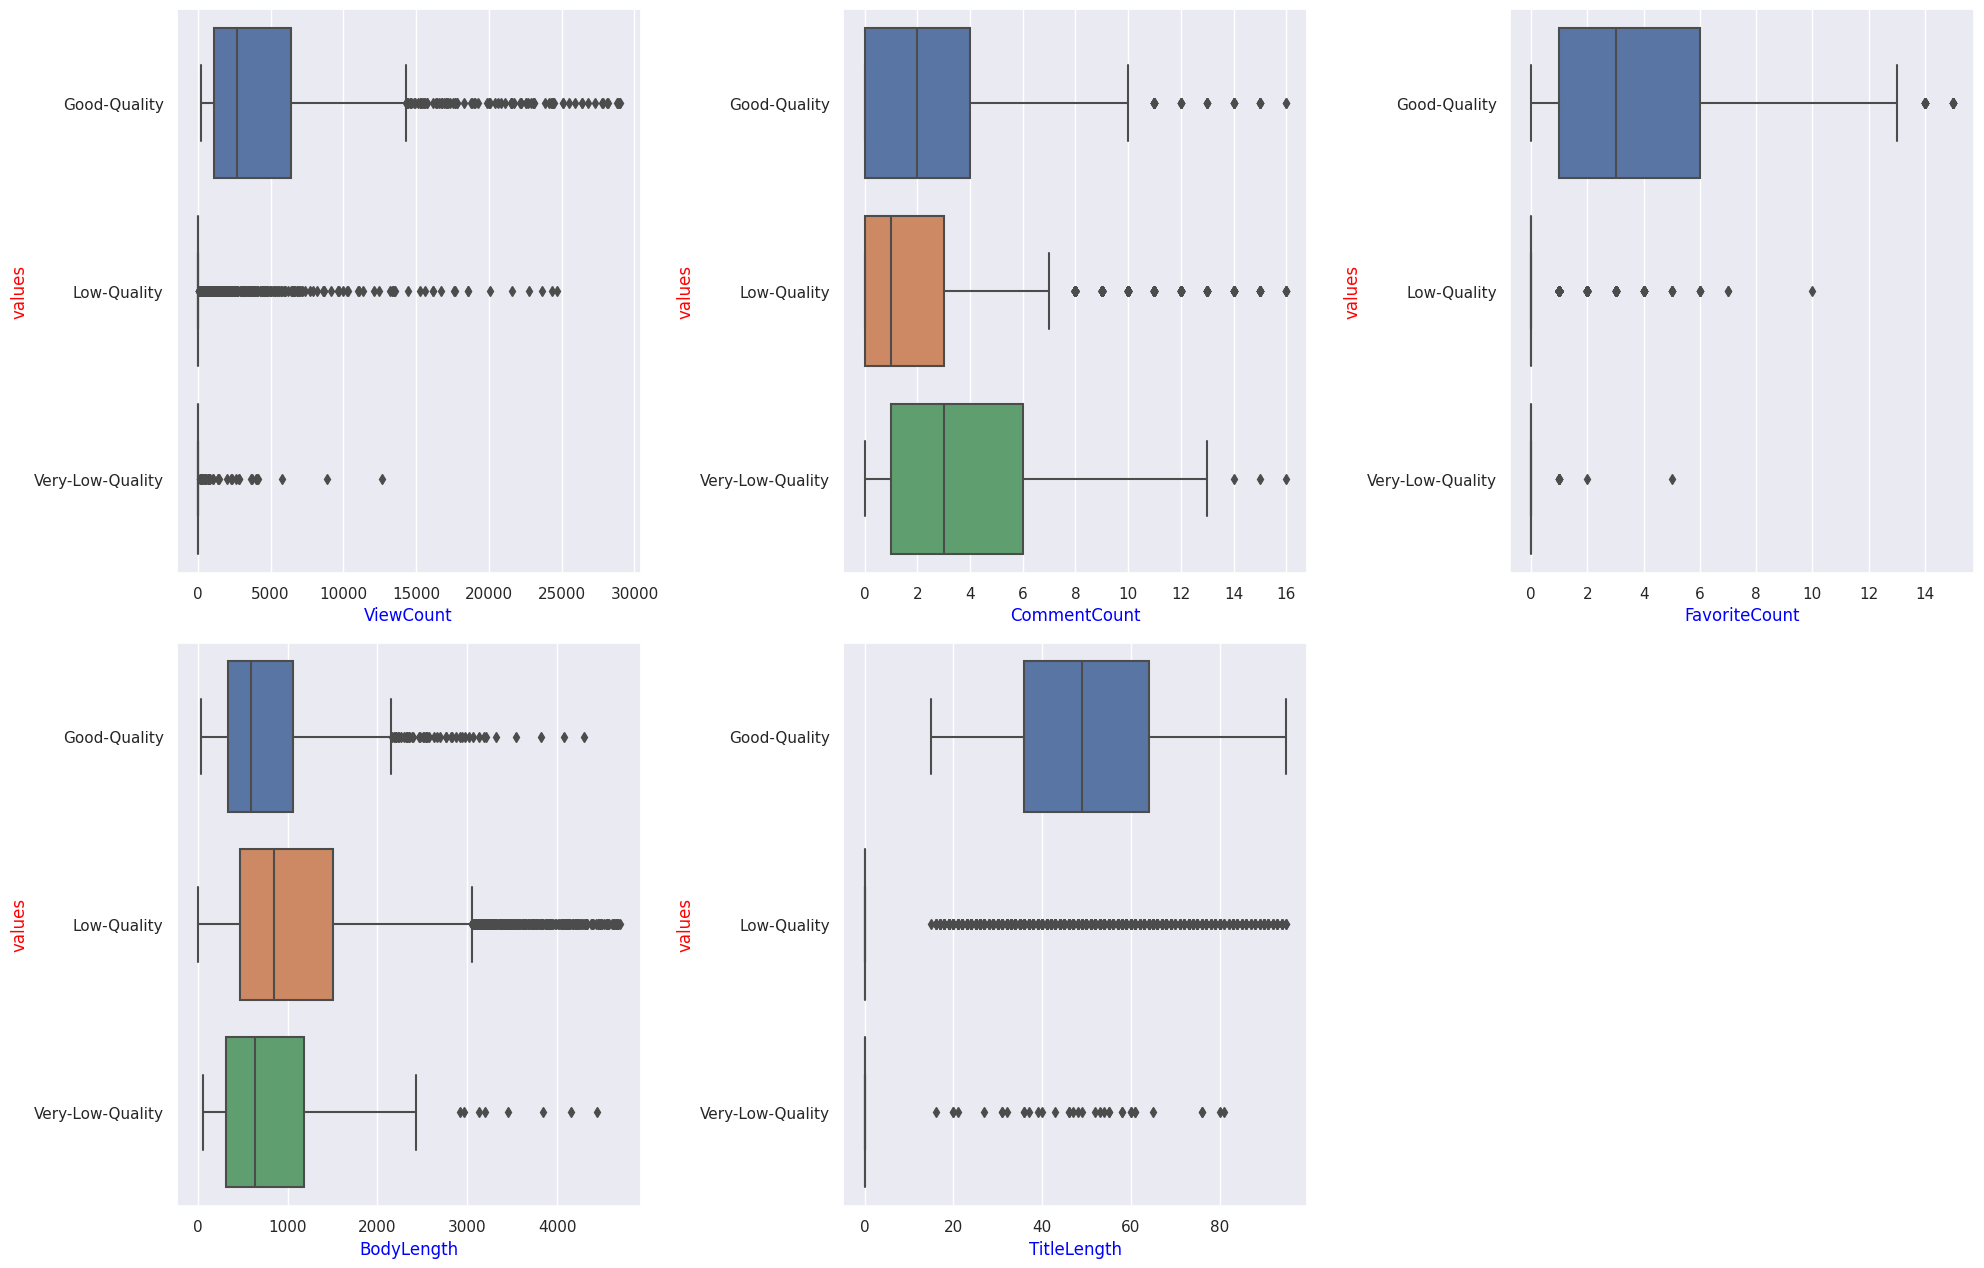

In [816]:
#job,marital,education_qual,call_type,prev_outcome mon
#list_cat_vars

#for categorical columns
from scipy.stats import stats
plots=431
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(20,25))

for con_column in list_con_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      df["z_score"]=stats.zscore(df[con_column])
      df=df[df["z_score"]>-3]
      df=df[df["z_score"]<3]
      sns.boxplot(x=con_column, y="Quality", data=df)
      plt.xlabel(con_column, color="blue")
      plt.ylabel("values", color="red")
      plots+=1


plt.tight_layout()
plt.show()



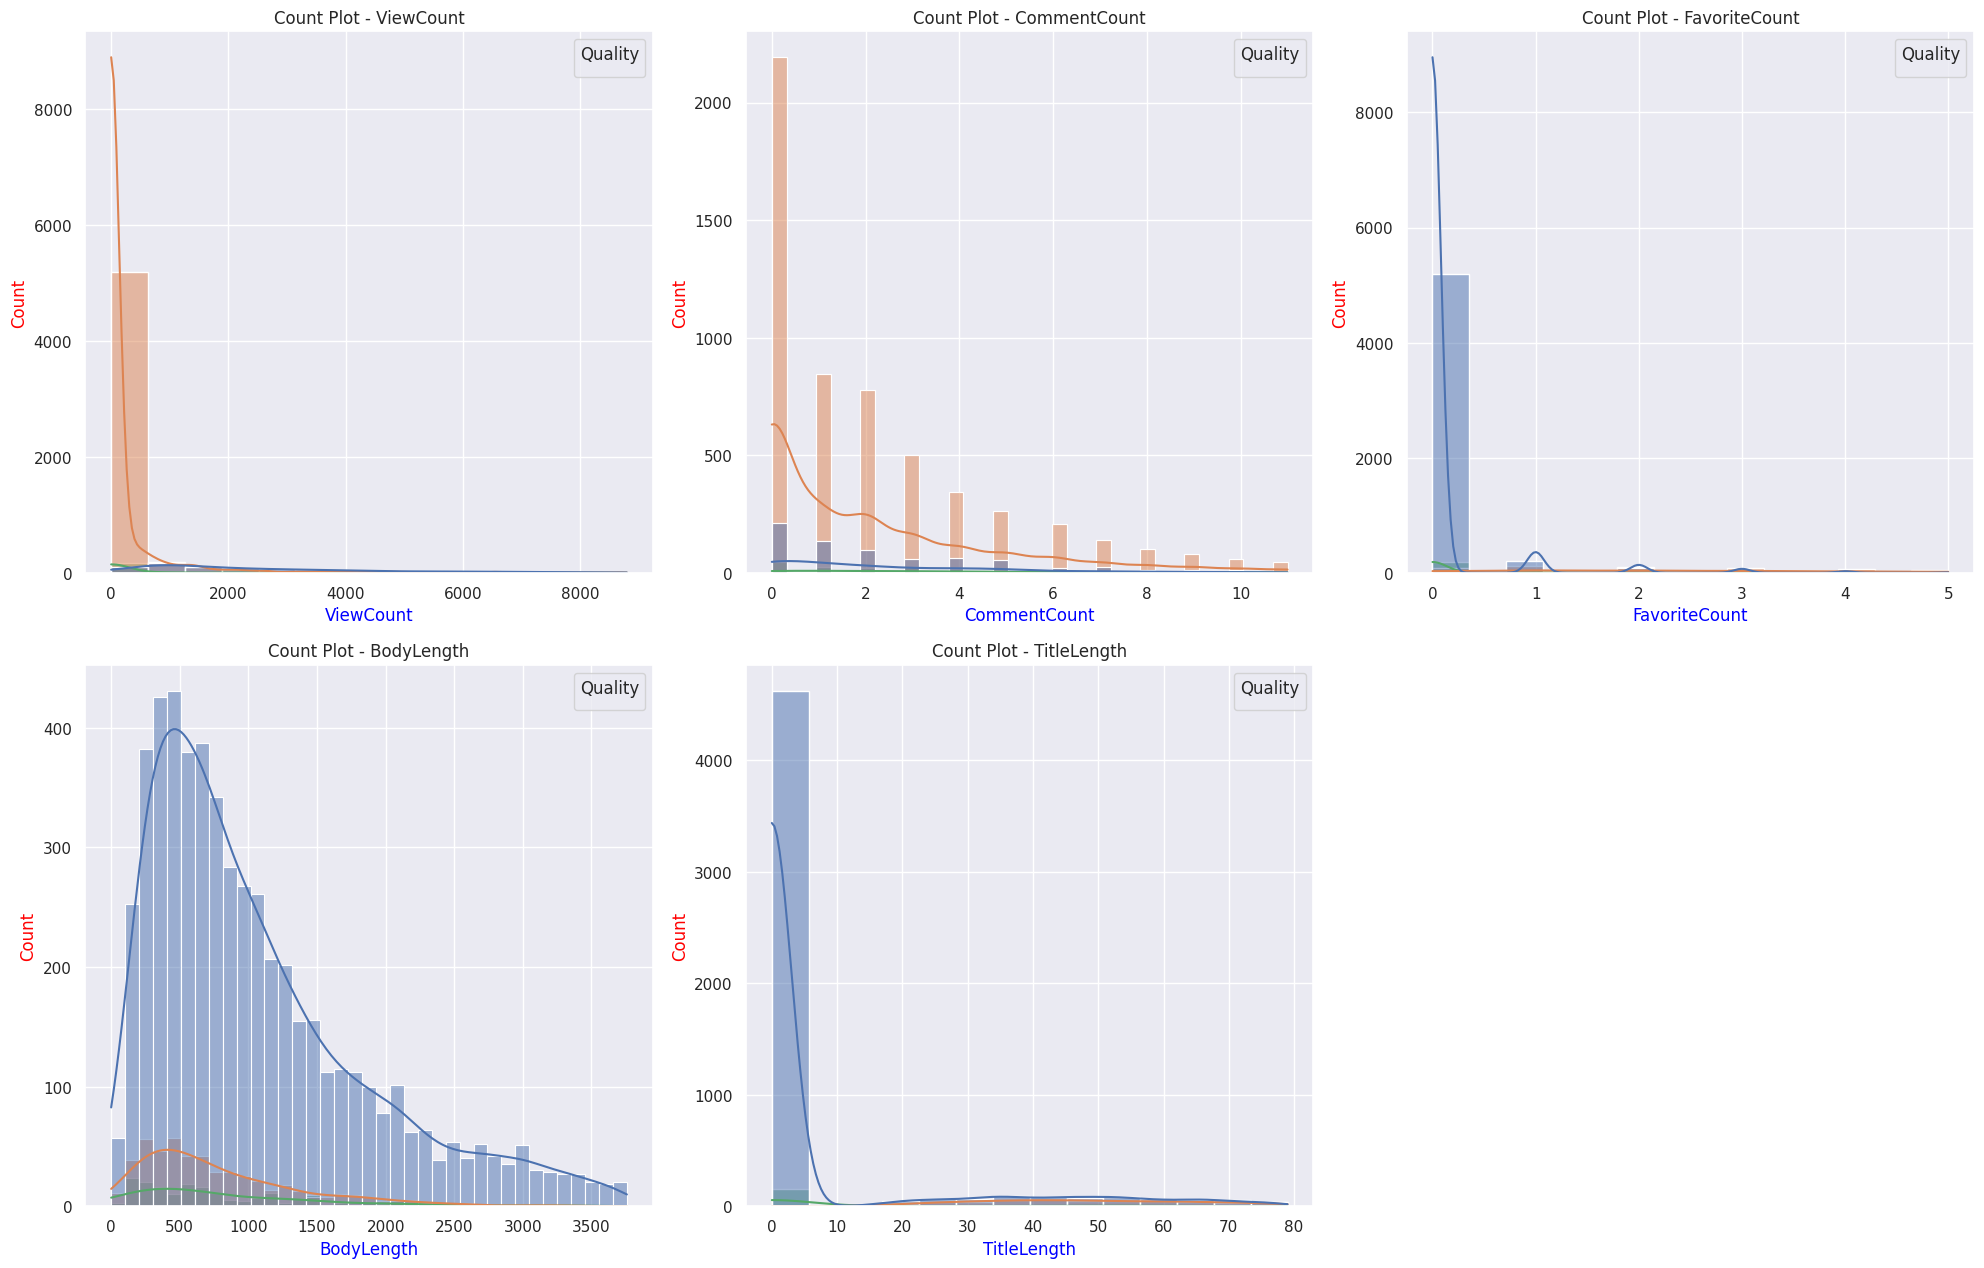

In [817]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

sns.set_theme(style='darkgrid', palette='pastel')
plt.figure(figsize=(20, 25))


# Define the number of subplots
plots = 431

# Iterate over the continuous variables
for con_column in list_con_vars:

      plt.subplot(plots)
      sns.set(style="darkgrid")
      df["z_score"]=scipy.stats.zscore(df[con_column])
      df=df[df["z_score"]>-3]
      df=df[df["z_score"]<3]
      sns.histplot(data=df, x=con_column, hue='Quality', kde=True)

    # Set x-axis label and title
      plt.xlabel(con_column, color='blue')
      plt.ylabel('Count', color='red')
      plt.title(f'Count Plot - {con_column}', fontsize=12)
      plt.legend(title='Quality')
      plots=plots+1


plt.tight_layout()
plt.show()



In [818]:
for i in df.columns:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" unique items.')

Column "ParentID" is divided into "1917" unique items.
Column "CreationDate" is divided into "5990" unique items.
Column "ViewCount" is divided into "988" unique items.
Column "Body" is divided into "5996" unique items.
Column "OwnerUserId" is divided into "762" unique items.
Column "LastActivityDate" is divided into "5536" unique items.
Column "Title" is divided into "1217" unique items.
Column "Tags" is divided into "945" unique items.
Column "CommentCount" is divided into "12" unique items.
Column "FavoriteCount" is divided into "6" unique items.
Column "Quality" is divided into "3" unique items.
Column "BodyLength" is divided into "2268" unique items.
Column "TitleLength" is divided into "66" unique items.
Column "z_score" is divided into "66" unique items.


In [819]:
df_x=df.copy()

In [820]:
df_x.columns

Index(['ParentID', 'CreationDate', 'ViewCount', 'Body', 'OwnerUserId',
       'LastActivityDate', 'Title', 'Tags', 'CommentCount', 'FavoriteCount',
       'Quality', 'BodyLength', 'TitleLength', 'z_score'],
      dtype='object')

In [821]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a LabelEncoder object
le = LabelEncoder()
d=["CreationDate","LastActivityDate","Body","Title","Tags"]
list_cat_vars.extend(d)

for i in list_cat_vars:
  df[f"{i}_encoded"]=le.fit_transform(df[i])

# Print the resulting DataFrame


df.drop(columns=list_cat_vars,inplace=True)


df.columns


Index(['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength',
       'TitleLength', 'z_score', 'ParentID_encoded', 'OwnerUserId_encoded',
       'Quality_encoded', 'CreationDate_encoded', 'LastActivityDate_encoded',
       'Body_encoded', 'Title_encoded', 'Tags_encoded'],
      dtype='object')

In [822]:
df.drop(["CreationDate_encoded","LastActivityDate_encoded"],axis=1,inplace=True)

In [823]:
df.columns
df.dtypes

ViewCount                int64
CommentCount             int64
FavoriteCount            int64
BodyLength               int64
TitleLength              int64
z_score                float64
ParentID_encoded         int64
OwnerUserId_encoded      int64
Quality_encoded          int64
Body_encoded             int64
Title_encoded            int64
Tags_encoded             int64
dtype: object

**Correspondance between categorical variable vs categorical variable**

In [824]:
list_cat_vars_encoded=[]
for i in list_cat_vars:
  list_cat_vars_encoded.append(f"{i}_encoded")
list_cat_vars_encoded

['ParentID_encoded',
 'OwnerUserId_encoded',
 'Quality_encoded',
 'CreationDate_encoded',
 'LastActivityDate_encoded',
 'Body_encoded',
 'Title_encoded',
 'Tags_encoded']

In [825]:
list_cat_vars_encoded.remove('CreationDate_encoded')
list_cat_vars_encoded.remove('LastActivityDate_encoded')




In [826]:
list_cat_vars_encoded

['ParentID_encoded',
 'OwnerUserId_encoded',
 'Quality_encoded',
 'Body_encoded',
 'Title_encoded',
 'Tags_encoded']

In [827]:
df.columns
list_con_vars

['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength', 'TitleLength']

In [828]:
from scipy import stats

for var in list_cat_vars_encoded:
    var1 = df[var]
    var2 = df["Quality_encoded"]
    contingency_table = pd.crosstab(var1, var2)

    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    num_obs = contingency_table.sum().sum()
    phi_coefficient = np.sqrt(chi2 / num_obs)
    cramers_v = phi_coefficient / np.sqrt(min(contingency_table.shape) - 1)

    phi_coefficient_2x2, _, _, _ = stats.chi2_contingency(contingency_table, correction=False)
    phi_coefficient_2x2 = np.sqrt(phi_coefficient_2x2 / num_obs)
    print(f"for {var}")
    print("Chi-square test statistic:", chi2)
    print("P-value:", p_value)
    print("Cramér's V:", cramers_v)
    print("Phi coefficient (2x2):", phi_coefficient_2x2)
    print("*"*12)
    print()

for ParentID_encoded
Chi-square test statistic: 3610.921090188467
P-value: 0.9948849536767221
Cramér's V: 0.5486899134844915
Phi coefficient (2x2): 0.775964717187088
************

for OwnerUserId_encoded
Chi-square test statistic: 3646.027684230331
P-value: 3.2765292090487114e-175
Cramér's V: 0.5513507360742456
Phi coefficient (2x2): 0.7797276885805869
************

for Quality_encoded
Chi-square test statistic: 11994.0
P-value: 0.0
Cramér's V: 1.0
Phi coefficient (2x2): 1.4142135623730951
************

for Body_encoded
Chi-square test statistic: 11993.999999999998
P-value: 0.48798057549955304
Cramér's V: 0.9999999999999999
Phi coefficient (2x2): 1.414213562373095
************

for Title_encoded
Chi-square test statistic: 6928.003725638411
P-value: 0.0
Cramér's V: 0.7600147729029457
Phi coefficient (2x2): 1.0748231994432538
************

for Tags_encoded
Chi-square test statistic: 5936.720580899841
P-value: 0.0
Cramér's V: 0.7035440300194968
Phi coefficient (2x2): 0.9949615089801964
**

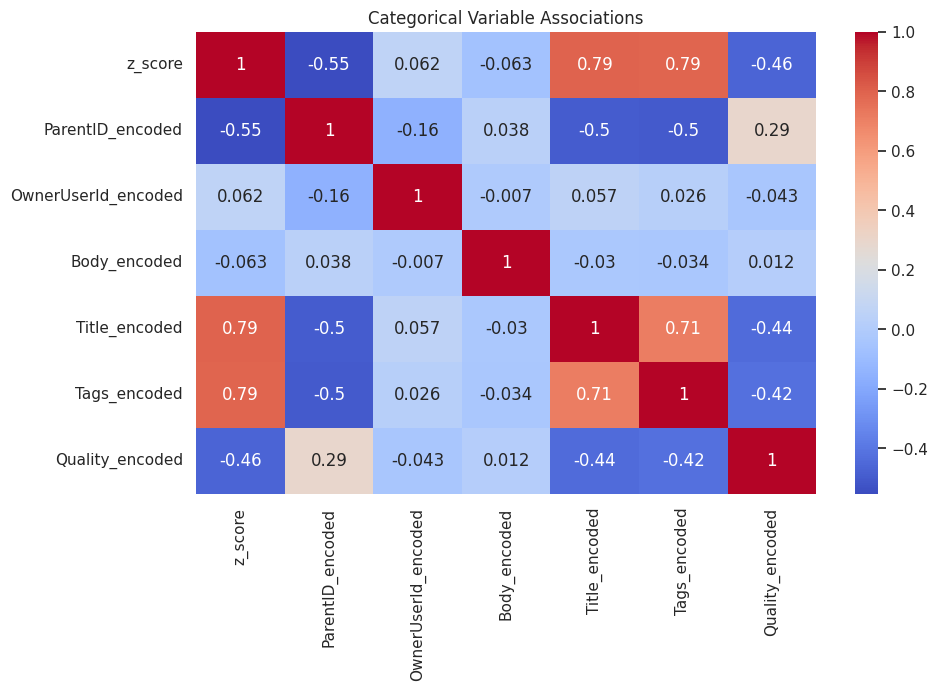

In [829]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Create a dataframe with the categorical variables

data=df.drop(columns=list_con_vars,axis=1)

column_to_move = 'Quality_encoded'

# Reorder the columns
columns = data.columns.tolist()
columns.remove(column_to_move)
columns.append(column_to_move)
data = data[columns]

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Categorical Variable Associations')
fig = plt.gcf()
fig.set_size_inches(10, 6)

# Display the plot
plt.show()


In [830]:
df.describe()

,ViewCount,CommentCount,FavoriteCount,BodyLength,TitleLength,z_score,ParentID_encoded,OwnerUserId_encoded,Quality_encoded,Body_encoded,Title_encoded,Tags_encoded
count,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000,5997.000000
mean,338.148574,2.082708,0.253627,1038.599633,9.504419,-0.068251,737.282808,310.458729,0.953977,2997.000167,123.384359,98.132733
std,1039.198391,2.535504,0.824009,787.492652,20.219365,0.887699,622.269354,249.841904,0.325505,1731.328825,291.299098,231.338063
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.485527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,446.000000,0.000000,-0.485527,91.000000,67.000000,1.000000,1498.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,806.000000,0.000000,-0.485527,669.000000,200.000000,1.000000,2997.000000,0.000000,0.000000
75%,0.000000,3.000000,0.000000,1405.000000,0.000000,-0.485527,1291.000000,553.000000,1.000000,4496.000000,0.000000,0.000000
max,8663.000000,11.000000,5.000000,3758.000000,79.000000,2.982843,1916.000000,761.000000,2.000000,5995.000000,1216.000000,944.000000


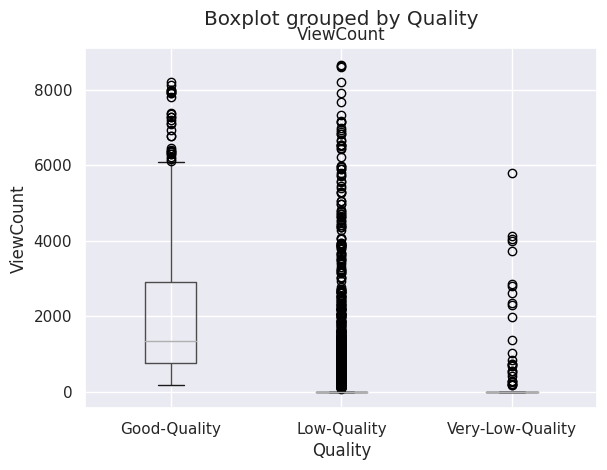

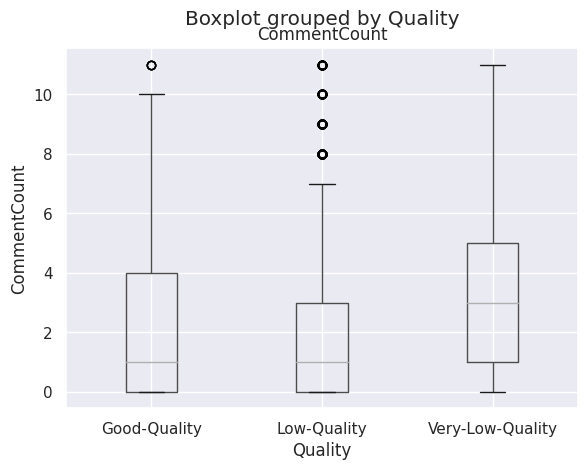

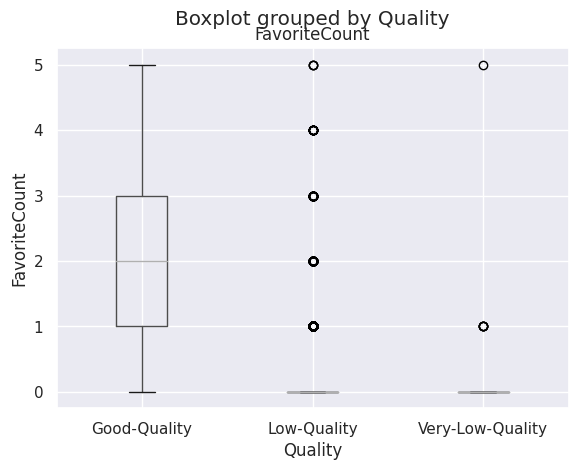

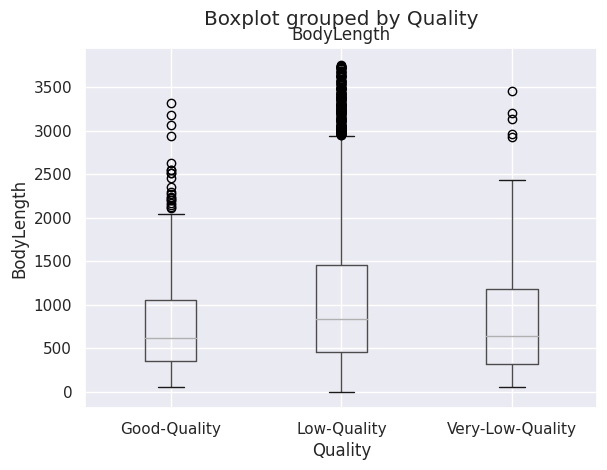

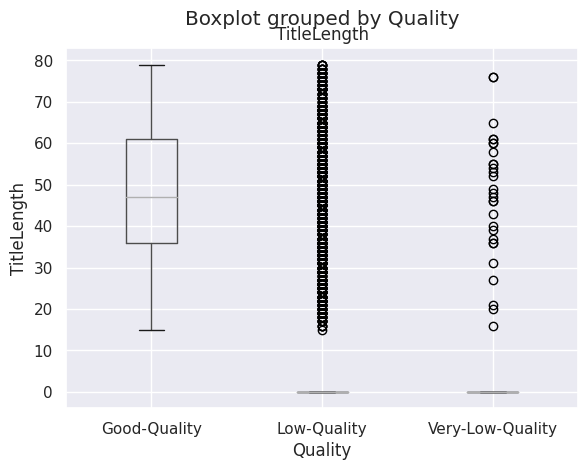

In [831]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with a continuous variable 'ContinuousVariable'
# and a categorical variable 'CategoryVariable'
for var in list_con_vars:
# Group data by the categorical variable and calculate the means of the continuous variable
     grouped_data = df_x.groupby('Quality')[var].mean()

# Create a box plot to visualize the differences in means
     df_x.boxplot(column=var, by='Quality')
     plt.xlabel('Quality')
     plt.ylabel(var)


In [832]:
df_x.columns

Index(['ParentID', 'CreationDate', 'ViewCount', 'Body', 'OwnerUserId',
       'LastActivityDate', 'Title', 'Tags', 'CommentCount', 'FavoriteCount',
       'Quality', 'BodyLength', 'TitleLength', 'z_score'],
      dtype='object')

In [833]:
df.columns

Index(['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength',
       'TitleLength', 'z_score', 'ParentID_encoded', 'OwnerUserId_encoded',
       'Quality_encoded', 'Body_encoded', 'Title_encoded', 'Tags_encoded'],
      dtype='object')

In [834]:
import pandas as pd

# Assuming you have a DataFrame called 'df_x' with continuous variables and a categorical variable 'Quality_encoded'
# Also assuming you have a list of continuous variables called 'list_con_vars'

# Calculate the correlation matrix between continuous variables and categorical variable
correlation_matrix = df[list_con_vars + ['Quality_encoded']].corr()

# Display the correlation matrix
print(correlation_matrix)

                 ViewCount  CommentCount  FavoriteCount  BodyLength  \
ViewCount         1.000000      0.028864       0.497795   -0.137582   
CommentCount      0.028864      1.000000       0.047672    0.126731   
FavoriteCount     0.497795      0.047672       1.000000   -0.092185   
BodyLength       -0.137582      0.126731      -0.092185    1.000000   
TitleLength       0.610294      0.054396       0.585459   -0.164468   
Quality_encoded  -0.411300      0.028054      -0.575161    0.051556   

                 TitleLength  Quality_encoded  
ViewCount           0.610294        -0.411300  
CommentCount        0.054396         0.028054  
FavoriteCount       0.585459        -0.575161  
BodyLength         -0.164468         0.051556  
TitleLength         1.000000        -0.462456  
Quality_encoded    -0.462456         1.000000  


In [835]:
df.columns

Index(['ViewCount', 'CommentCount', 'FavoriteCount', 'BodyLength',
       'TitleLength', 'z_score', 'ParentID_encoded', 'OwnerUserId_encoded',
       'Quality_encoded', 'Body_encoded', 'Title_encoded', 'Tags_encoded'],
      dtype='object')

 **Based on the provided statistics, the variables "Quality_encoded," "Body_encoded," and "Title_encoded" can be considered as important predictors of the categorical outcome.


 These variables exhibit significant associations with the outcome based on their high Chi-square test statistics, low p-values, and relatively high Cramér's V values.

 However, the order of importance may vary depending on the specific context and research question, so it's crucial to consider the overall context when interpreting the results.**

**To draw conclusions from the provided statistics, you can consider the following guidelines:

Chi-square test statistic: This statistic measures the overall association between two categorical variables. Higher values indicate a stronger association.

P-value: The p-value determines the statistical significance of the association. It represents the probability of observing the observed association (or a more extreme one) by chance alone. A smaller p-value (e.g., less than 0.05) suggests that the association is unlikely to be due to chance and is considered statistically significant.

Cramér's V: Cramér's V is a measure of association strength. It ranges from 0 to 1, where 0 indicates no association and 1 represents a perfect association. Higher values indicate a stronger association between the variables.

Phi coefficient: The Phi coefficient is specifically applicable to 2x2 contingency tables. Like Cramér's V, it measures the strength of association between categorical variables, ranging from 0 to 1.

Based on these statistics, you can make the following conclusions:

If the p-value is less than the chosen significance level (e.g., 0.05), you can conclude that there is a statistically significant association between the variables.
If the p-value is greater than the chosen significance level, you fail to reject the null hypothesis, indicating that there is insufficient evidence to conclude a significant association.
Cramér's V and Phi coefficient values can be used to gauge the strength of association. Higher values indicate a stronger association between the variables.**

In [836]:
import pandas as pd
from scipy.stats import f_oneway





# Iterate over the continuous variables
for column in list_con_vars:
    print(f"ANOVA results for {column}:")
    print("*" * 10)

    # Separate the continuous variable by the categories in the categorical variable
    groups = df.groupby('Quality_encoded')[column]

    # Extract the data for each group
    group_A = groups.get_group(0)
    group_B = groups.get_group(1)
    group_C = groups.get_group(2)

    # Perform ANOVA
    f_stat, p_val = f_oneway(group_A, group_B, group_C)

    # Print the ANOVA results
    print("ANOVA results:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_val}")
    print("*" * 10)
    print()


ANOVA results for ViewCount:
**********
ANOVA results:
F-statistic: 958.1413467465495
P-value: 0.0
**********

ANOVA results for CommentCount:
**********
ANOVA results:
F-statistic: 24.15705039547355
P-value: 3.554532247933941e-11
**********

ANOVA results for FavoriteCount:
**********
ANOVA results:
F-statistic: 2493.242539493862
P-value: 0.0
**********

ANOVA results for BodyLength:
**********
ANOVA results:
F-statistic: 33.82210237402699
P-value: 2.4746447158854966e-15
**********

ANOVA results for TitleLength:
**********
ANOVA results:
F-statistic: 1314.7148637759844
P-value: 0.0
**********



 The importance can be determined by the magnitude of the F-statistic and the significance level (p-value). Generally, a higher F-statistic and a lower p-value indicate a stronger association.


 **The variables "FavoriteCount" and "TitleLength" have the highest importance based on their high F-statistic values and low p-values.

  "FavoriteCount" has the highest association strength with the categorical variable, followed by "TitleLength."

   The significance of these associations suggests their importance in understanding the categorical variable.**

**MACHINE LEARNING MODEL**

In [837]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalize the features in X


X=df.drop(["Quality_encoded"],axis=1)
X = scaler.fit_transform(X)
y=df["Quality_encoded"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)




# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the accuracies
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.9125
Multinomial Naive Bayes Accuracy: 0.8791666666666667
Random Forest Accuracy: 0.9141666666666667


In [841]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each classifier
logreg_param_grid = {'C': [0.1, 1, 10]}

mnb_param_grid = {'alpha': [0.1, 1, 10]}

rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10]}

# Perform grid search for each classifier

logreg_grid = GridSearchCV(LogisticRegression(solver='liblinear'), logreg_param_grid, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_pred = logreg_grid.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

mnb_grid = GridSearchCV(MultinomialNB(), mnb_param_grid, cv=5)
mnb_grid.fit(X_train, y_train)
mnb_pred = mnb_grid.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the best parameters and best scores for each classifier
print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression Best Score:", logreg_grid.best_score_)
print("Logistic Regression Accuracy:", logreg_accuracy)
print()

print("Multinomial Naive Bayes Best Parameters:", mnb_grid.best_params_)
print("Multinomial Naive Bayes Best Score:", mnb_grid.best_score_)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print()

print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Best Parameters: {'C': 1}
Logistic Regression Best Score: 0.9182829336114008
Logistic Regression Accuracy: 0.9158333333333334
Multinomial Naive Bayes Best Parameters: {'alpha': 10}
Multinomial Naive Bayes Best Score: 0.8922212808481056
Multinomial Naive Bayes Accuracy: 0.8791666666666667
Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Random Forest Best Score: 0.9195331508515814
Random Forest Accuracy: 0.9158333333333334


In [842]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each classifier
logreg_param_grid = {'C': [0.1, 1, 10]}

mnb_param_grid = {'alpha': [0.1, 1, 10]}

rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10]}

# Perform grid search for each classifier

logreg_grid = GridSearchCV(LogisticRegression(solver='liblinear'), logreg_param_grid, cv=5)
logreg_grid.fit(X_train, y_train)
logreg_pred = logreg_grid.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

mnb_grid = GridSearchCV(MultinomialNB(), mnb_param_grid, cv=5)
mnb_grid.fit(X_train, y_train)
mnb_pred = mnb_grid.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the best parameters and best scores for each classifier
print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print("Logistic Regression Best Score:", logreg_grid.best_score_)
print("Logistic Regression Accuracy:", logreg_accuracy)
print()

print("Multinomial Naive Bayes Best Parameters:", mnb_grid.best_params_)
print("Multinomial Naive Bayes Best Score:", mnb_grid.best_score_)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print()

print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best Score:", rf_grid.best_score_)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Best Parameters: {'C': 1}
Logistic Regression Best Score: 0.9182829336114008
Logistic Regression Accuracy: 0.9158333333333334
Multinomial Naive Bayes Best Parameters: {'alpha': 10}
Multinomial Naive Bayes Best Score: 0.8922212808481056
Multinomial Naive Bayes Accuracy: 0.8791666666666667
Random Forest Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Random Forest Best Score: 0.9199496002780674
Random Forest Accuracy: 0.9183333333333333
